# Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read Datasheet

In [2]:
# Read the Fuchka sheet
fuchka_df = pd.read_excel('HMTL Datasheet.xlsx', sheet_name='Fuchka')

# Read the Tamarind sheet  
tamarind_df = pd.read_excel('HMTL Datasheet.xlsx', sheet_name='Tamarind')


In [3]:
# Read the Hazard Intensity Scores
his_df = pd.read_excel('HMTL Datasheet.xlsx', sheet_name='Intensity Score')

In [4]:
print("Data loaded successfully!")
print(f"Fuchka shape: {fuchka_df.shape}")
print(f"Tamarind shape: {tamarind_df.shape}")
print(f"HIS shape: {his_df.shape}")

Data loaded successfully!
Fuchka shape: (42, 11)
Tamarind shape: (42, 13)
HIS shape: (12, 2)


### Load Hazard Intensity Scores

In [5]:
# Create a dictionary of Metal → HIS for easy lookup
his_dict = dict(zip(his_df['Metal'], his_df['Hazard Intensity Score']))
print("Hazard Intensity Scores:")
print(his_dict)

Hazard Intensity Scores:
{'As': 1675, 'Pb': 1531, 'Hg': 1455, 'Cd': 1317, 'Cr': 892, 'Co': 1015, 'Ni': 994, 'Zn': 916, 'Cu': 807, 'Mn': 799, 'Al': 685, 'Sb': 604}


# Inspect and clean data

In [6]:
# Cell 4: Inspect and clean data
print("=== Fuchka Data (first 5 rows) ===")
print(fuchka_df.head())
print("\nFuchka columns:", fuchka_df.columns.tolist())

print("\n=== Tamarind Data (first 5 rows) ===")
print(tamarind_df.head())
print("\nTamarind columns:", tamarind_df.columns.tolist())


=== Fuchka Data (first 5 rows) ===
   Sample ID       Pb     Cd      Cr     Hg     Co      Ni        Al       Cu  \
0          1  1790.62  48.04  141.16  0.550  53.86  462.26  21126.69  1400.48   
1          2    86.32   1.00   10.00  4.710  10.00   10.00   4269.81  1266.94   
2          3  1190.14  29.58  101.52  4.344  47.18  317.98   8444.97  1386.72   
3          4    10.00   1.00  142.34  0.550  60.34  233.06   6107.98  1354.14   
4          5    10.00   1.00  116.78  0.550  57.06  261.96   3461.49  1222.76   

        Zn       Mn  
0  4391.82  6275.88  
1  5395.86  6087.30  
2  5232.78  5352.08  
3  6348.70  7407.26  
4  4742.80  5631.78  

Fuchka columns: ['Sample ID', 'Pb', 'Cd', 'Cr', 'Hg', 'Co', 'Ni', 'Al', 'Cu', 'Zn', 'Mn']

=== Tamarind Data (first 5 rows) ===
   Sample ID         Pb       Cd        Cr       Hg      Co       Ni  \
0          1     1.2500   2.0475  18.86625  0.37500  4.1675  21.9550   
1          2     1.2500  13.3380  37.70625  0.37500  1.2500   1.2500   
2

# Standardize column names and handle missing metals

In [7]:
# Get all unique metals from both datasets
fuchka_metals = set(fuchka_df.columns) - {'Sample ID'}
tamarind_metals = set(tamarind_df.columns) - {'Sample ID'}
all_metals = fuchka_metals.union(tamarind_metals)

print("Metals in Fuchka:", sorted(fuchka_metals))
print("Metals in Tamarind:", sorted(tamarind_metals))
print("All metals combined:", sorted(all_metals))


Metals in Fuchka: ['Al', 'Cd', 'Co', 'Cr', 'Cu', 'Hg', 'Mn', 'Ni', 'Pb', 'Zn']
Metals in Tamarind: ['Al', 'As', 'Cd', 'Co', 'Cr', 'Cu', 'Hg', 'Mn', 'Ni', 'Pb', 'Sb', 'Zn']
All metals combined: ['Al', 'As', 'Cd', 'Co', 'Cr', 'Cu', 'Hg', 'Mn', 'Ni', 'Pb', 'Sb', 'Zn']


In [8]:
# Add missing metals as zero columns
for metal in all_metals:
    if metal not in fuchka_df.columns:
        fuchka_df[metal] = 0
        print(f"Added {metal} to Fuchka (filled with 0)")
    if metal not in tamarind_df.columns:
        tamarind_df[metal] = 0
        print(f"Added {metal} to Tamarind (filled with 0)")


Added As to Fuchka (filled with 0)
Added Sb to Fuchka (filled with 0)


In [9]:
# Fill any NaN values with 0
fuchka_df = fuchka_df.fillna(0)
tamarind_df = tamarind_df.fillna(0)


# Merge into combined concentrations table

In [10]:
# Ensure both dataframes have the same metal columns in same order
metal_columns = sorted(all_metals)
fuchka_ordered = fuchka_df[['Sample ID'] + metal_columns].copy()
tamarind_ordered = tamarind_df[['Sample ID'] + metal_columns].copy()


In [11]:
# Create combined dataframe
combined_df = pd.DataFrame()
combined_df['Sample ID'] = fuchka_ordered['Sample ID']


# Attach HIS to combined table and compute weighted contributions

In [12]:
# Compute combined concentrations for each metal
for metal in metal_columns:
    combined_df[f'Combined_{metal}'] = fuchka_ordered[metal] + tamarind_ordered[metal]

print("Combined concentrations table created!")
print(f"Combined table shape: {combined_df.shape}")
print("\nFirst 5 rows of combined data:")
print(combined_df.head())


Combined concentrations table created!
Combined table shape: (42, 13)

First 5 rows of combined data:
   Sample ID  Combined_Al  Combined_As  Combined_Cd  Combined_Co  Combined_Cr  \
0          1  23975.95625      17.6150      50.0875      58.0275    160.02625   
1          2   6514.16750       1.2500      14.3380      11.2500     47.70625   
2          3  14092.73750      91.1475      31.4520      52.7750    170.09625   
3          4  10165.40875       1.2500       7.4350      61.5900    157.12875   
4          5   5697.33000       1.2500       8.8000      60.0850    140.82875   

   Combined_Cu  Combined_Hg  Combined_Mn  Combined_Ni  Combined_Pb  \
0    1743.1225      0.92500    8465.6275     484.2150    1791.8700   
1    1606.0300      5.08500    7184.4975      11.2500      87.5700   
2    1853.0500      4.71900    6921.6775     337.9825    1191.3900   
3    1576.2725      0.92500    8644.7825     238.7475      11.2500   
4    1373.1325      1.56275    6039.2275     314.7525    2699

In [13]:
# Compute contribution for each metal
for metal in metal_columns:
    if metal in his_dict:
        his_value = his_dict[metal]
        combined_df[f'Contribution_{metal}'] = combined_df[f'Combined_{metal}'] * his_value
        print(f"Computed contribution for {metal} (HIS: {his_value})")
    else:
        print(f"Warning: No HIS found for {metal}, skipping contribution calculation")


Computed contribution for Al (HIS: 685)
Computed contribution for As (HIS: 1675)
Computed contribution for Cd (HIS: 1317)
Computed contribution for Co (HIS: 1015)
Computed contribution for Cr (HIS: 892)
Computed contribution for Cu (HIS: 807)
Computed contribution for Hg (HIS: 1455)
Computed contribution for Mn (HIS: 799)
Computed contribution for Ni (HIS: 994)
Computed contribution for Pb (HIS: 1531)
Computed contribution for Sb (HIS: 604)
Computed contribution for Zn (HIS: 916)


# Sum across metals for final HMTL

In [14]:
# Get all contribution columns
contribution_columns = [col for col in combined_df.columns if col.startswith('Contribution_')]
print(f"Contribution columns: {contribution_columns}")

Contribution columns: ['Contribution_Al', 'Contribution_As', 'Contribution_Cd', 'Contribution_Co', 'Contribution_Cr', 'Contribution_Cu', 'Contribution_Hg', 'Contribution_Mn', 'Contribution_Ni', 'Contribution_Pb', 'Contribution_Sb', 'Contribution_Zn']


In [15]:
# Calculate HMTL as sum of all contributions
combined_df['HMTL_co_consumed'] = combined_df[contribution_columns].sum(axis=1)

print("HMTL calculation completed!")


HMTL calculation completed!


In [16]:
print("=== HMTL Results (first 10 rows) ===")
results_display = combined_df[['Sample ID', 'HMTL_co_consumed']].head(10)
print(results_display)

print("\n=== Summary Statistics for HMTL ===")
print(combined_df['HMTL_co_consumed'].describe())

print(f"\nMinimum HMTL: {combined_df['HMTL_co_consumed'].min():.2f}")
print(f"Maximum HMTL: {combined_df['HMTL_co_consumed'].max():.2f}")
print(f"Mean HMTL: {combined_df['HMTL_co_consumed'].mean():.2f}")


=== HMTL Results (first 10 rows) ===
   Sample ID  HMTL_co_consumed
0          1      3.251469e+07
1          2      1.689794e+07
2          3      2.458638e+07
3          4      2.183743e+07
4          5      1.963880e+07
5          6      2.489137e+07
6          7      1.665091e+07
7          8      2.633374e+07
8          9      2.285608e+07
9         10      1.881723e+07

=== Summary Statistics for HMTL ===
count    4.200000e+01
mean     3.658227e+07
std      1.568157e+07
min      1.665091e+07
25%      2.369888e+07
50%      3.514728e+07
75%      4.728467e+07
max      7.982923e+07
Name: HMTL_co_consumed, dtype: float64

Minimum HMTL: 16650905.89
Maximum HMTL: 79829228.04
Mean HMTL: 36582272.34


### Save output

In [17]:
# Save complete results to Excel
output_filename = 'HMTL_Results.xlsx'
combined_df.to_excel(output_filename, index=False, sheet_name='HMTL_Results')
print(f"Complete results saved to {output_filename}")


Complete results saved to HMTL_Results.xlsx


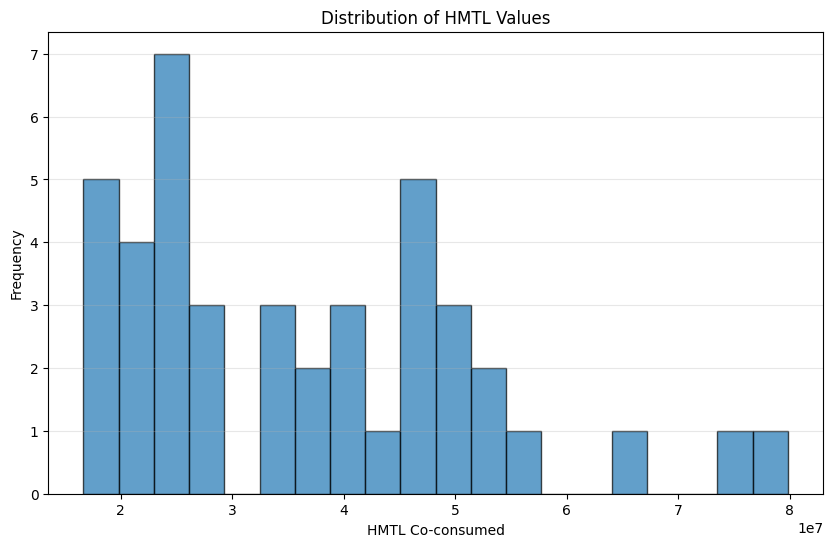

Analysis completed successfully!


In [18]:
plt.figure(figsize=(10, 6))
plt.hist(combined_df['HMTL_co_consumed'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of HMTL Values')
plt.xlabel('HMTL Co-consumed')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)
plt.show()

print("Analysis completed successfully!")